In [142]:
import gpxpy
import gpxpy.gpx

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [143]:

with open('Routes/DD100K_2021.gpx', 'r') as gpx_file:
    DDgpx = gpxpy.parse(gpx_file)

In [144]:
DDgpx

GPX(tracks=[GPXTrack(name='Prince William County Trail Running', segments=[GPXTrackSegment(points=[...])])])

In [145]:
DDgpx.get_track_points_no()

59640

In [146]:
with open('Routes/2-loop_mtvernon.gpx', 'r') as gpx_file:
    loop2gpx = gpxpy.parse(gpx_file)

In [147]:
loop2gpx.get_track_points_no()

4304

In [148]:
loop2gpx.get_elevation_extremes()

MinimumMaximum(minimum=-27.200000762939453, maximum=28.399999618530273)

In [149]:
loop2gpx.get_uphill_downhill()

UphillDownhill(uphill=284.19998838156533, downhill=302.59998800009583)

In [150]:
print('# of tracks - ',len(loop2gpx.tracks))
print('# of segments - ',len(loop2gpx.tracks[0].segments))

# of tracks -  1
# of segments -  1


In [151]:
loop2gpx.tracks[0].segments[0].points[:10]

[GPXTrackPoint(38.79649353213608, -77.04552322626114, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 53, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.79648883827031, -77.04551886767149, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 54, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.796473080292344, -77.04550998285413, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 55, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.79645690321922, -77.04550285823643, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 56, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.796427231281996, -77.04549883492291, elevation=-2.799999952316284, time=datetime.datetime(2021, 11, 19, 14, 52, 57, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.79639437422156, -77.04550009220839, elevation=-2.4000000953674316, time=datetime.datetime(2021, 11, 19, 14, 52, 58, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.796363696455956, -77.04550453461707, elevation=-2.0, time=datetime.datetime(2021, 11, 19, 14,

In [152]:
route_info=[]

for track in loop2gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'time': point.time,
                'latitude': point.latitude,
                'longitude':point.longitude,
                'elevation': point.elevation
            })

route_info[:3]

[{'time': datetime.datetime(2021, 11, 19, 14, 52, 53, tzinfo=SimpleTZ("Z")),
  'latitude': 38.79649353213608,
  'longitude': -77.04552322626114,
  'elevation': -3.0},
 {'time': datetime.datetime(2021, 11, 19, 14, 52, 54, tzinfo=SimpleTZ("Z")),
  'latitude': 38.79648883827031,
  'longitude': -77.04551886767149,
  'elevation': -3.0},
 {'time': datetime.datetime(2021, 11, 19, 14, 52, 55, tzinfo=SimpleTZ("Z")),
  'latitude': 38.796473080292344,
  'longitude': -77.04550998285413,
  'elevation': -3.0}]

In [153]:
route_2loop_df = pd.DataFrame(route_info)
route_2loop_df.head()

,time,latitude,longitude,elevation
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8


In [154]:

route_2loop_df.to_csv('data/route_2loop_df.csv', index=False)

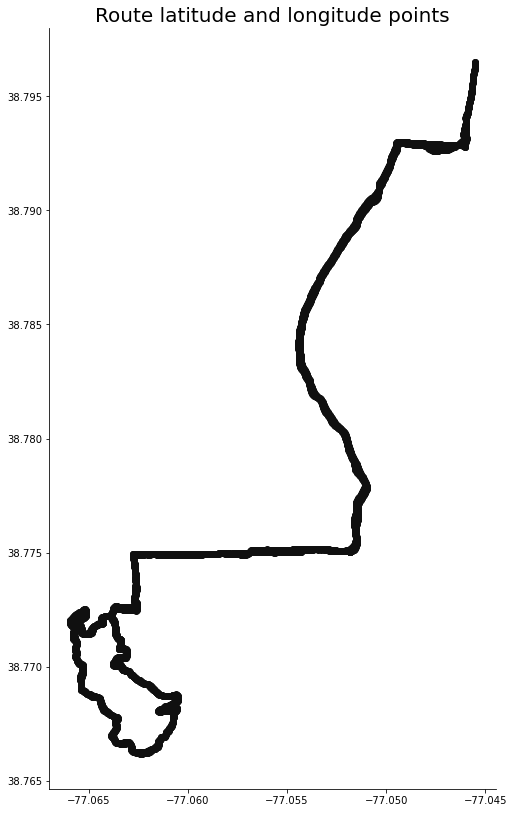

In [155]:
plt.figure(figsize=(8, 14))
plt.scatter(route_2loop_df['longitude'], route_2loop_df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

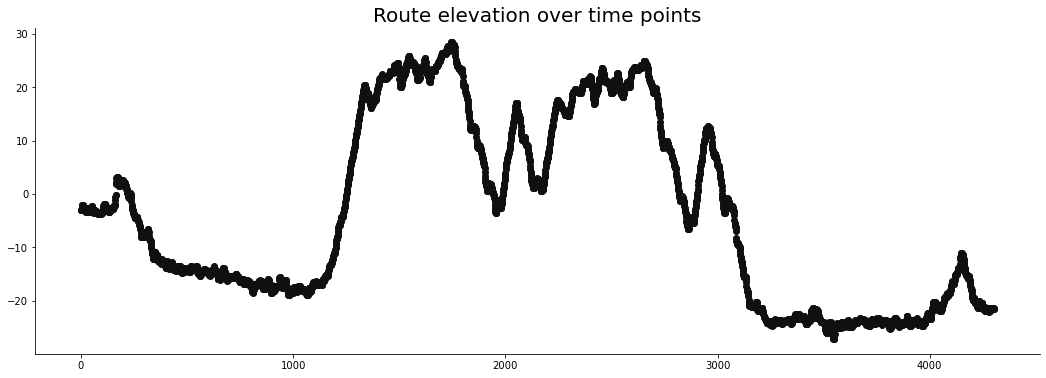

In [156]:
plt.figure(figsize=(18,6))
plt.scatter(route_2loop_df.index, route_2loop_df['elevation'], color='#101010')
plt.title('Route elevation over time points', size=20);

In [157]:
route_2loop_df.head()

,time,latitude,longitude,elevation
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8


In [158]:
pointxyz = []
for i in range(0,len(route_2loop_df)):
    pointxyz.append((route_2loop_df['latitude'][i], route_2loop_df['longitude'][i], route_2loop_df['elevation'][i]))

pointxyz[0]

(38.79649353213608, -77.04552322626114, -3.0)

In [159]:
route_2loop_df['pointxyz']= pd.Series(pointxyz)
route_2loop_df.head()

,time,latitude,longitude,elevation,pointxyz
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0,"(38.79649353213608, -77.04552322626114, -3.0)"
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0,"(38.79648883827031, -77.04551886767149, -3.0)"
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0,"(38.796473080292344, -77.04550998285413, -3.0)"
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0,"(38.79645690321922, -77.04550285823643, -3.0)"
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8,"(38.796427231281996, -77.04549883492291, -2.79..."


In [160]:
from geopy.distance import lonlat, distance
from geopy import distance
import math

In [161]:
# Get Step distance, i.e. distance between points.
dist = [0]

for i in range(len(route_2loop_df)-1):
    
    b_latlon = route_2loop_df['pointxyz'][i+1][:2]
    a_latlon = route_2loop_df['pointxyz'][i][:2]

    # OG elevation in meters (1000m = .6 miles)  so change meters into km and then convert to miles
    b_elv = route_2loop_df['pointxyz'][i+1][2]/1000*.6
    a_elv = route_2loop_df['pointxyz'][i][2]/1000*.6
    eldiff = b_elv-a_elv

    flat_distance =distance.distance(a_latlon,b_latlon).miles

    euc_distance = math.sqrt(flat_distance**2 + eldiff**2)
    dist.append(euc_distance)

route_2loop_df['step_dist'] = pd.Series(dist)
route_2loop_df.head()


,time,latitude,longitude,elevation,pointxyz,step_dist
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0,"(38.79649353213608, -77.04552322626114, -3.0)",0.000000
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0,"(38.79648883827031, -77.04551886767149, -3.0)",0.000400
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0,"(38.796473080292344, -77.04550998285413, -3.0)",0.001188
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0,"(38.79645690321922, -77.04550285823643, -3.0)",0.001180
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8,"(38.796427231281996, -77.04549883492291, -2.79...",0.002062


In [162]:
# 1 sec is 1/60th of minute and a minute is 1/60th of an hour so 

speed = []
for i in range(len(route_2loop_df)):
    mph = route_2loop_df['step_dist'][i]/(1/60/60)
    speed.append(mph)

route_2loop_df['mph'] = pd.Series(speed)

In [163]:
elevation_change = [0]

for i in range(1,len(route_2loop_df)):
    prev_el = route_2loop_df['elevation'][i-1]
    new_el = route_2loop_df['elevation'][i]
    change_el = new_el-prev_el
    elevation_change.append(change_el)

route_2loop_df['elevation_change'] = pd.Series(elevation_change)
route_2loop_df.head()


,time,latitude,longitude,elevation,pointxyz,step_dist,mph,elevation_change
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0,"(38.79649353213608, -77.04552322626114, -3.0)",0.000000,0.000000,0.0
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0,"(38.79648883827031, -77.04551886767149, -3.0)",0.000400,1.440858,0.0
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0,"(38.796473080292344, -77.04550998285413, -3.0)",0.001188,4.277103,0.0
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0,"(38.79645690321922, -77.04550285823643, -3.0)",0.001180,4.249086,0.0
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8,"(38.796427231281996, -77.04549883492291, -2.79...",0.002062,7.422258,0.2


In [164]:
# rnage of elevation 
route_2loop_df.describe()

,latitude,longitude,elevation,step_dist,mph,elevation_change
count,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000
mean,38.776891,-77.057857,-3.665892,0.001958,7.050208,-0.004275
std,0.008550,0.006189,17.281843,0.000503,1.809371,0.222090
min,38.766160,-77.065959,-27.200001,0.000000,0.000000,-1.200000
25%,38.770136,-77.063445,-18.600000,0.001687,6.073177,-0.199999
50%,38.774916,-77.060646,-6.600000,0.002035,7.324486,0.000000
75%,38.782989,-77.052164,12.800000,0.002244,8.077030,0.199999
max,38.796494,-77.045499,28.400000,0.010075,36.270216,2.000000


In [171]:
route_2loop_df['5sec_rolling_elv'] = route_2loop_df['elevation_change'].rolling(5).mean()
route_2loop_df['second'] = route_2loop_df.index
route_2loop_df[10:20]

,time,latitude,longitude,elevation,pointxyz,step_dist,mph,elevation_change,5sec_rolling_elv
10,2021-11-19 14:53:03+00:00,38.796248,-77.045531,-2.2,"(38.79624827764928, -77.04553068615496, -2.200...",0.002283,8.219338,-0.2,0.04
11,2021-11-19 14:53:04+00:00,38.796213,-77.045538,-2.4,"(38.79621349275112, -77.04553806222975, -2.400...",0.002435,8.766764,-0.2,-0.08
12,2021-11-19 14:53:05+00:00,38.796177,-77.045542,-2.4,"(38.79617736674845, -77.0455424208194, -2.4000...",0.002503,9.010918,0.0,-0.08
13,2021-11-19 14:53:06+00:00,38.796144,-77.045550,-2.6,"(38.79614409059286, -77.04554996453226, -2.599...",0.002334,8.403474,-0.2,-0.12
14,2021-11-19 14:53:07+00:00,38.796116,-77.045559,-2.6,"(38.79611584357917, -77.04555943608284, -2.599...",0.002014,7.251940,0.0,-0.12
15,2021-11-19 14:53:08+00:00,38.796089,-77.045567,-2.6,"(38.79608918912709, -77.04556706361473, -2.599...",0.001884,6.782933,0.0,-0.08
16,2021-11-19 14:53:09+00:00,38.796058,-77.045568,-2.6,"(38.79605800844729, -77.04556773416698, -2.599...",0.002151,7.744066,0.0,-0.04
17,2021-11-19 14:53:10+00:00,38.796022,-77.045577,-2.6,"(38.79602230153978, -77.04557695426047, -2.599...",0.002513,9.046171,0.0,-0.04
18,2021-11-19 14:53:11+00:00,38.795982,-77.045586,-2.8,"(38.79598215222359, -77.04558625817299, -2.799...",0.002817,10.141935,-0.2,-0.04
19,2021-11-19 14:53:12+00:00,38.795949,-77.045597,-2.8,"(38.79594921134412, -77.04559681937099, -2.799...",0.002343,8.433616,0.0,-0.04


In [ ]:
portion

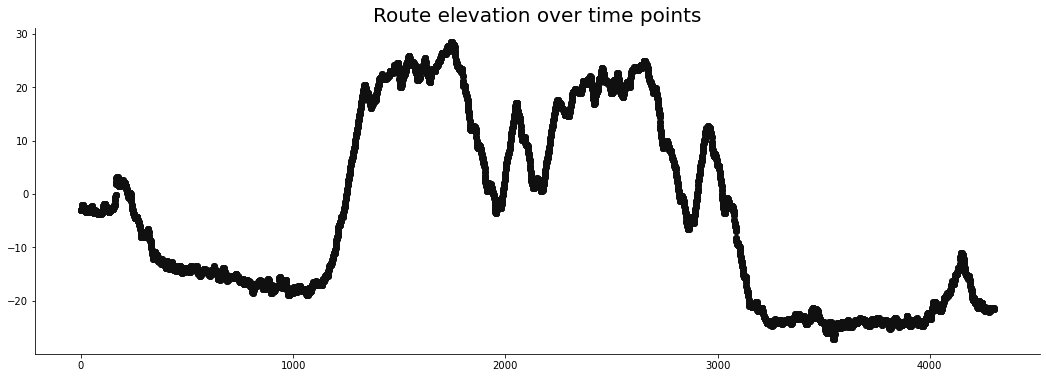

In [166]:
plt.figure(figsize=(18,6))
plt.scatter(route_2loop_df.index, route_2loop_df['elevation'], color='#101010')
plt.scatter(route_2loop_df.index, route_2loop_df['elevation'], color='#101010')

plt.title('Route elevation over time points', size=20);

In [167]:
el_change_distribution = elevation_change.copy()
el_change_distribution.sort()

In [168]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

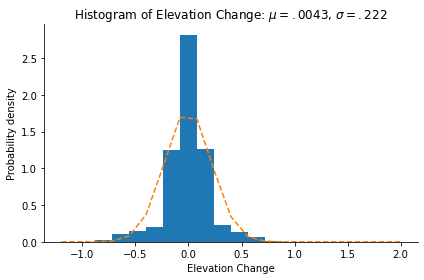

In [169]:
n_bins = 20

# Generate two normal distributions
dist1 = el_dist_df

mu = dist1.mean()[0]  # mean of distribution
sigma = dist1.std()[0]  # standard deviation of distribution

fig, ax = plt.subplots()

# We can set the number of bins with the *bins* keyword argument.
n, bins, patches = ax.hist(dist1, bins=n_bins, density=True)

# # add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Elevation Change')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Elevation Change: $\mu=.0043$, $\sigma=.222$')

# # # Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [197]:
import datetime

# seconds to time
def sec_2_time(seconds):
    str_time = str(datetime.timedelta(seconds=seconds))
    # hours = seconds//3600
    # minutes_left = (seconds-(hours*3600))//60
    # sec_left = (seconds-(hours*3600)-(minutes_left*60))%60
    # element_time = (hours, minutes_left, sec_left)
    return str_time


sec_2_time(3905)

'1:05:05'

In [198]:
from time import strftime
from time import gmtime

strftime("%H:%M:%S", gmtime(3905))
'00:11:06'

'00:11:06'

In [ ]:
# levels of elevation change
# flat = 0
# slight up = 
# slight down <
# steep up > 0.5
# steep down < 0.5
lables = ['SteepD','SlightD','Flat','SlightU','SteepU']
custome_cut =[-inf, -0.5, -0.25, 0.25, 0.5, inf]

#  do it over a set length of distance... not every step.

In [196]:
route_2loop_df.to_csv('data/route_2loop_df.csv', index=False)